In [48]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [36]:
def PMTfit(filename, deg = 10):
    # deg: the highest degree of the fitting polynomial
    timeTickFirst, timeTickLast, x, PMT1, PMT1_raw, PMT1_bottom, PMT1_top, PMT2, PMT2_raw, PMT2_bottom, PMT2_top = np.loadtxt(filename, comments='#', delimiter='\t', converters=None, skiprows=0,unpack=True)
    z = np.polyfit(x, PMT1, deg)
    p = np.poly1d(z)
    fig = plt.subplot(111)
    plt.plot(x, PMT1, '.', x, p(x), '-')
    plt.title(filename)
    plt.show()
    return p(x)

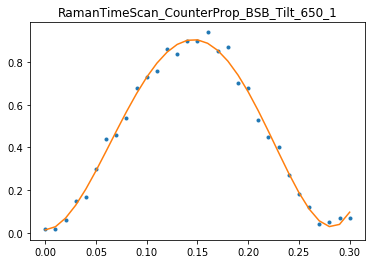

In [33]:
BSB = PMTfit('RamanTimeScan_CounterProp_BSB_Tilt_650_1', deg = 5)

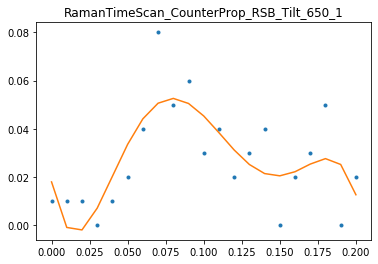

In [34]:
RSB = PMTfit('RamanTimeScan_CounterProp_RSB_Tilt_650_1', deg = 5)

In [30]:
n = max(RSB)/(max(BSB)-max(RSB))
n

0.06177360546213511

## Fit a batch of data

In [78]:
import os

fnames = []
for root, dirs, files in os.walk("."):
    for filename in files:
        fnames.append(filename)
print(sorted(fnames))

['.DS_Store', 'Error_002.log', 'Heating.xlsx', 'MotionalQuantaFit_PolynomialFit-checkpoint.ipynb', 'MotionalQuantaFit_PolynomialFit.ipynb', 'RamanTimeScan_CounterProp_BSB_Tilt_650_1', 'RamanTimeScan_CounterProp_BSB_Tilt_650_2', 'RamanTimeScan_CounterProp_BSB_Tilt_650_3', 'RamanTimeScan_CounterProp_BSB_Tilt_650_4', 'RamanTimeScan_CounterProp_BSB_Tilt_650_5', 'RamanTimeScan_CounterProp_BSB_Tilt_750_1', 'RamanTimeScan_CounterProp_BSB_Tilt_750_2', 'RamanTimeScan_CounterProp_BSB_Tilt_750_3', 'RamanTimeScan_CounterProp_BSB_Tilt_750_4', 'RamanTimeScan_CounterProp_BSB_Tilt_750_5', 'RamanTimeScan_CounterProp_BSB_Tilt_850_1', 'RamanTimeScan_CounterProp_BSB_Tilt_850_2', 'RamanTimeScan_CounterProp_BSB_Tilt_850_3', 'RamanTimeScan_CounterProp_BSB_Tilt_850_4', 'RamanTimeScan_CounterProp_BSB_Tilt_850_5', 'RamanTimeScan_CounterProp_BSB_Tilt_850_6', 'RamanTimeScan_CounterProp_BSB_Tilt_850_7', 'RamanTimeScan_CounterProp_BSB_Tilt_910_1', 'RamanTimeScan_CounterProp_BSB_Tilt_910_2', 'RamanTimeScan_CounterPr

In [80]:
BSB650 = sorted(fnames)[5:10]
BSB750 = sorted(fnames)[10:15]
BSB850 = sorted(fnames)[15:22]
BSB910 = sorted(fnames)[22:27]
RSB650 = sorted(fnames)[27:32]
RSB750 = sorted(fnames)[32:37]
RSB850 = sorted(fnames)[37:44]
RSB910 = sorted(fnames)[44:49]

print(BSB650)
print(BSB750)
print(BSB850)
print(BSB910)
print(RSB650)
print(RSB750)
print(RSB850)
print(RSB910)

['RamanTimeScan_CounterProp_BSB_Tilt_650_1', 'RamanTimeScan_CounterProp_BSB_Tilt_650_2', 'RamanTimeScan_CounterProp_BSB_Tilt_650_3', 'RamanTimeScan_CounterProp_BSB_Tilt_650_4', 'RamanTimeScan_CounterProp_BSB_Tilt_650_5']
['RamanTimeScan_CounterProp_BSB_Tilt_750_1', 'RamanTimeScan_CounterProp_BSB_Tilt_750_2', 'RamanTimeScan_CounterProp_BSB_Tilt_750_3', 'RamanTimeScan_CounterProp_BSB_Tilt_750_4', 'RamanTimeScan_CounterProp_BSB_Tilt_750_5']
['RamanTimeScan_CounterProp_BSB_Tilt_850_1', 'RamanTimeScan_CounterProp_BSB_Tilt_850_2', 'RamanTimeScan_CounterProp_BSB_Tilt_850_3', 'RamanTimeScan_CounterProp_BSB_Tilt_850_4', 'RamanTimeScan_CounterProp_BSB_Tilt_850_5', 'RamanTimeScan_CounterProp_BSB_Tilt_850_6', 'RamanTimeScan_CounterProp_BSB_Tilt_850_7']
['RamanTimeScan_CounterProp_BSB_Tilt_910_1', 'RamanTimeScan_CounterProp_BSB_Tilt_910_2', 'RamanTimeScan_CounterProp_BSB_Tilt_910_3', 'RamanTimeScan_CounterProp_BSB_Tilt_910_4', 'RamanTimeScan_CounterProp_BSB_Tilt_910_5']
['RamanTimeScan_CounterProp_

In [81]:
def Heating(x, a):
    return a * x

In [82]:
def heatingFit(xdata, ydata):
    popt, pcov = curve_fit(Heating, xdata, ydata)
    plt.plot(xdata, Heating(xdata, popt), 'b-',
         label='fit: Heating rate=%5.3f quantas/s' % tuple(popt))
    plt.plot(xdata, ydata, 'r.', label='data')
    plt.legend()
    plt.xlabel('Time (s)')
    plt.ylabel('Motional quanta')
    print(popt)

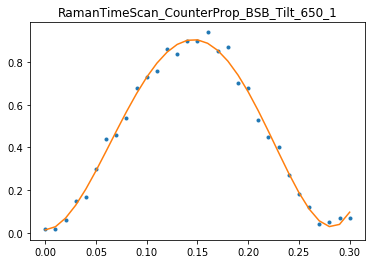

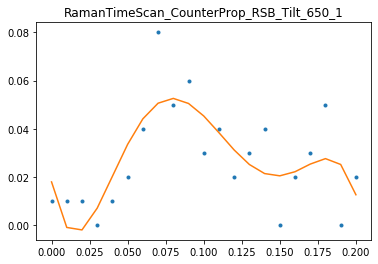

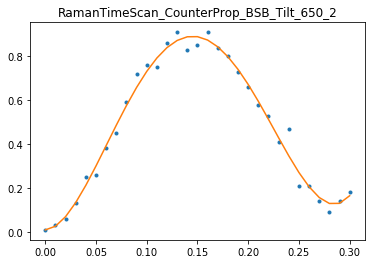

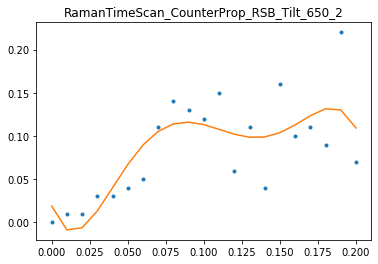

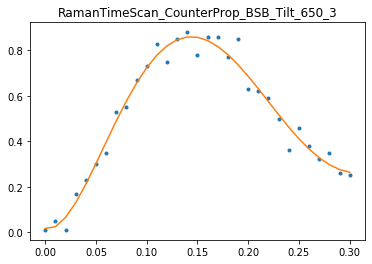

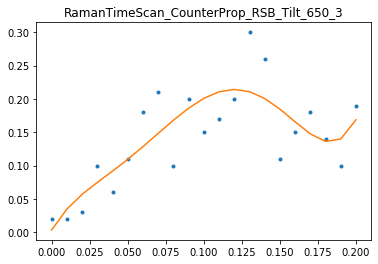

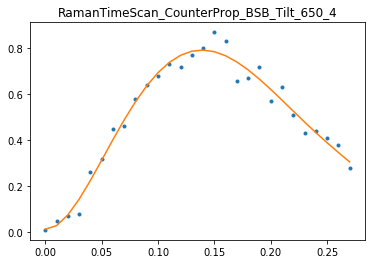

/Users/sunke/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.


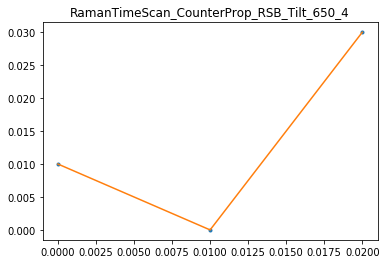

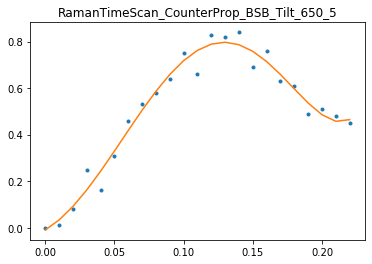

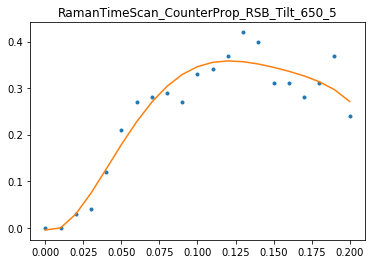

[10.00900441]


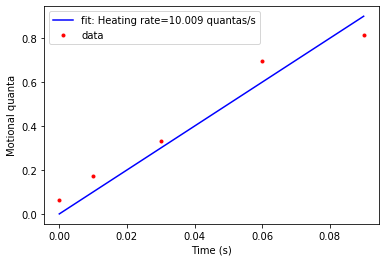

In [83]:
n650 = []
for i in range(len(BSB650)):
    BSB = PMTfit(BSB650[i], deg = 5)
    RSB = PMTfit(RSB650[i], deg = 5)
    n650.append(max(RSB)/(max(BSB)-max(RSB)))
T = [0.0, 0.01, 0.03, 0.06, 0.09]
n650[3] = 0.698225
heatingFit(T, n650)

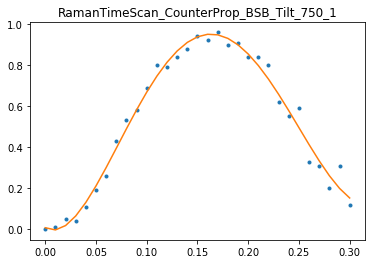

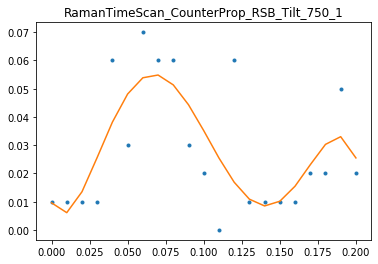

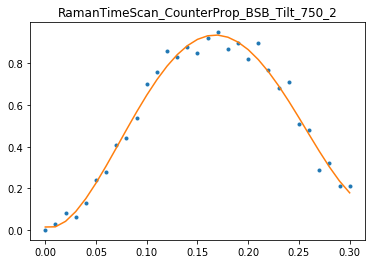

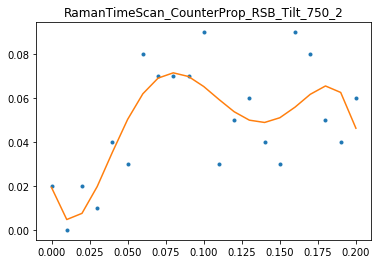

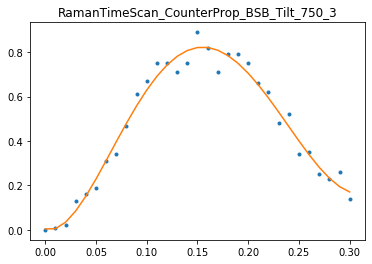

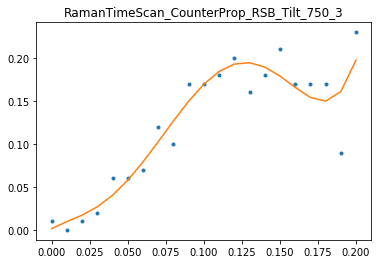

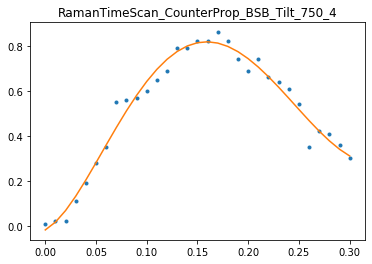

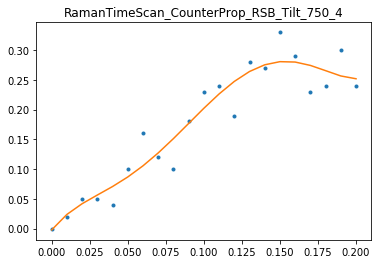

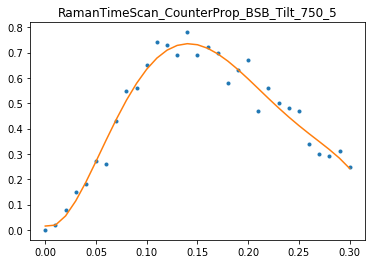

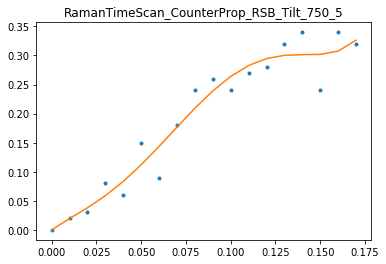

[8.94171217]


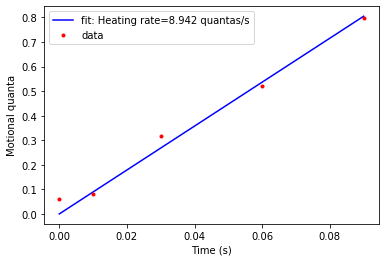

In [76]:
n750 = []
for i in range(len(BSB750)):
    BSB = PMTfit(BSB750[i], deg = 5)
    RSB = PMTfit(RSB750[i], deg = 5)
    n750.append(max(RSB)/(max(BSB)-max(RSB)))
T = [0.0, 0.01, 0.03, 0.06, 0.09]
heatingFit(T, n750)

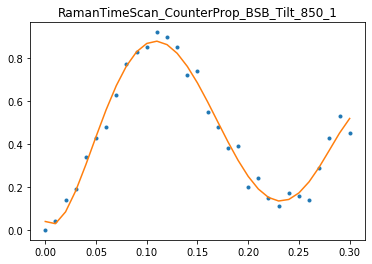

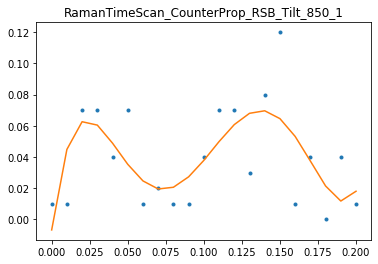

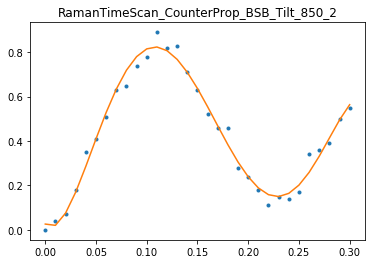

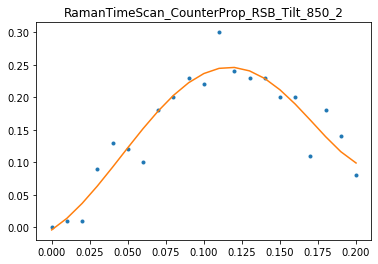

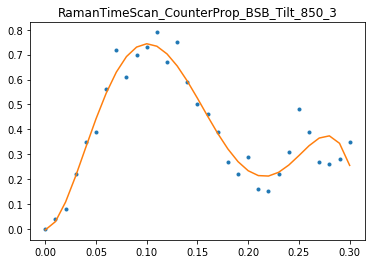

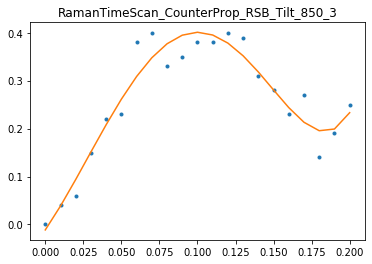

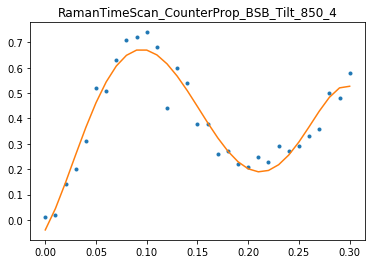

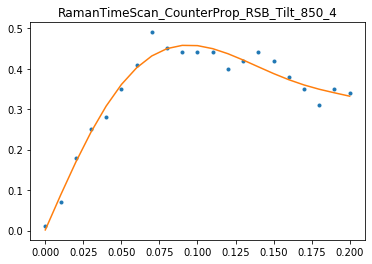

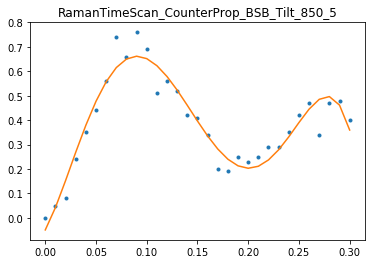

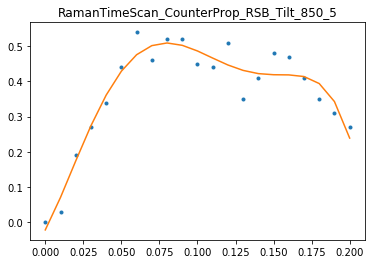

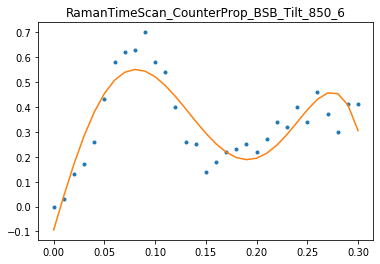

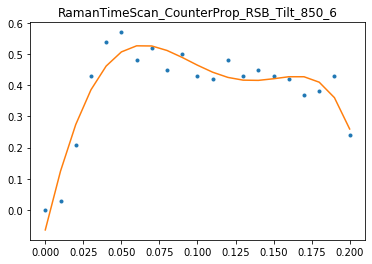

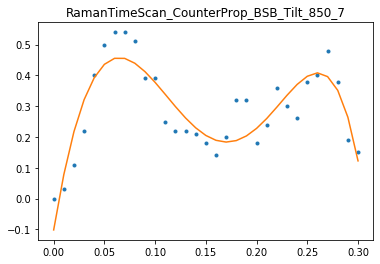

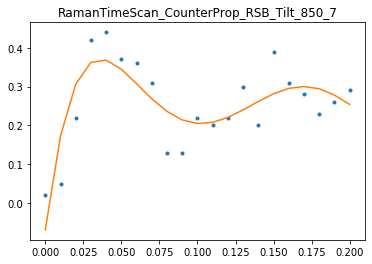

[31.3562493]


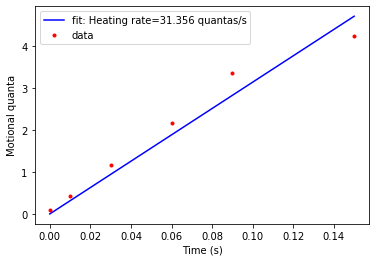

In [86]:
n850 = []
for i in range(len(BSB850)):
    BSB = PMTfit(BSB850[i], deg = 5)
    RSB = PMTfit(RSB850[i], deg = 5)
    n850.append(max(RSB)/(max(BSB)-max(RSB)))
T = [0.0, 0.01, 0.03, 0.06, 0.09, 0.12, 0.15]
del T[5]
del n850[5]
heatingFit(T, n850)

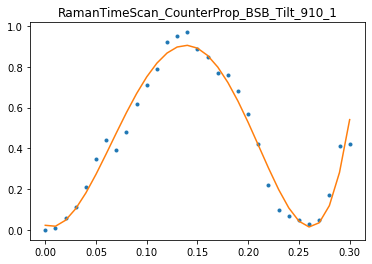

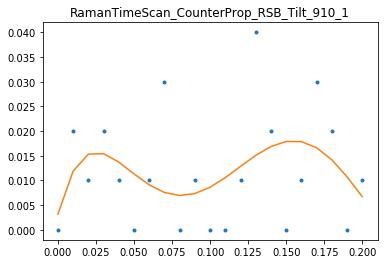

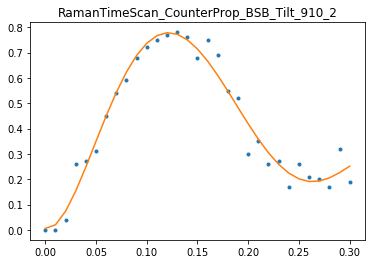

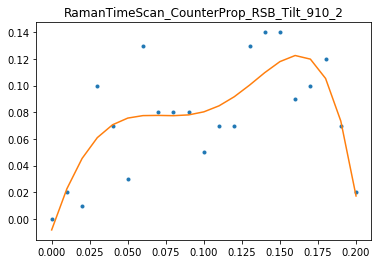

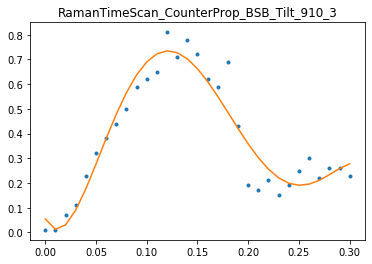

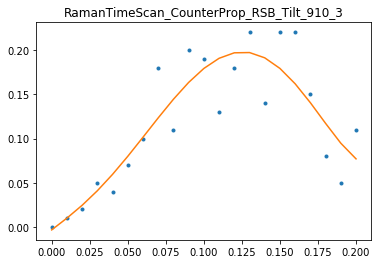

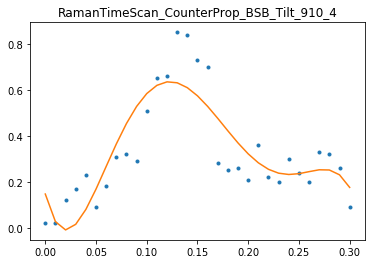

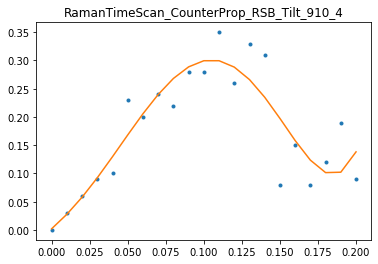

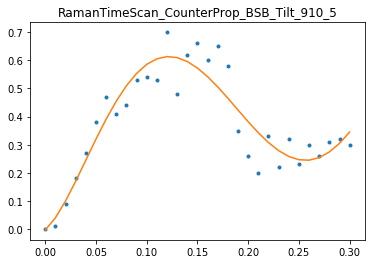

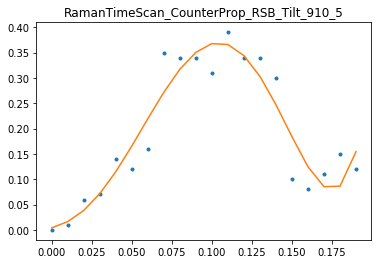

[15.83422528]


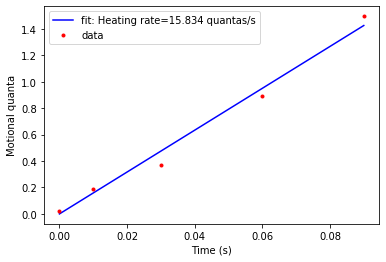

In [77]:
n910 = []
for i in range(len(BSB910)):
    BSB = PMTfit(BSB910[i], deg = 5)
    RSB = PMTfit(RSB910[i], deg = 5)
    n910.append(max(RSB)/(max(BSB)-max(RSB)))
T = [0.0, 0.01, 0.03, 0.06, 0.09]
heatingFit(T, n910)

In [87]:
fs = [223.1914,223.0193, 222.7845, 222.7008]
finvs = []
for f in fs:
    finvs.append(1/(225-f))
finvs

[0.552913856021228,
 0.5048720149442083,
 0.45136538027533457,
 0.4349338900487101]

Text(0, 0.5, 'Heating Rate (q/s)')

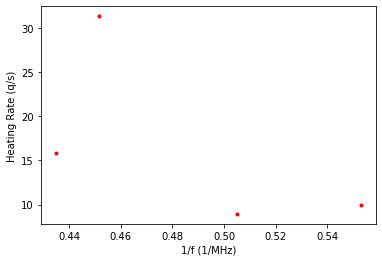

In [91]:
HeatingRates = [10.009, 8.942, 31.356, 15.834]
plt.plot(finvs, HeatingRates, 'r.')
plt.xlabel('1/f (1/MHz)')
plt.ylabel('Heating Rate (q/s)')